# A brief introduction to horizontally-averaged LES data

In this notebook we visually summarize some of the data generated by large eddy simulation that
we use to optimize column models.

The LES data has been processed by taking horizontal averages over snapshots of the solution.
The processed data for each run is stored in a single `jld2` file along with information
about the surface flux conditions, bottom boundary conditions, and grid.

In [1]:
using Pkg; Pkg.activate("..")

using ColumnModelOptimizationProject, JLD2, Printf

┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.1/ColumnModelOptimizationProject/HEzqG.ji for ColumnModelOptimizationProject [8137535c-6844-11e9-1caa-ffc4fab9c8ab]
└ @ Base loading.jl:1184


# Four prototypical cases

In this notebook, we show LES data obtained for each of the four canonical cases:

1. Free convection
2. Wind-driven shear mixing with neutral buoyancy forcing
3. Wind-driven shear mixing with destabilizing buoyancy forcing
4. Wind-driven shear mixing with stabilizing buoyancy forcing

## File structure of the processed data

The processed data files are `jld2` files with the groups:

* `grid`
* `boundary_conditions`
* `initial_condition`
* `timestepping`
* `constants`
* `timeseries`

The first five groups give information about the model setup. The last group, `timeseries`, 
stores the horizontally-averaged, one-dimensional large eddy simulation data for the four
fields \$ U \$, \$ V \$, \$ T \$, \$ S \$.

Below we specify the names of the cases, 
the paths to `jld2` files that store data from representative simulations, 
and visualize the format of the dataset.

In [2]:
cases = ["free_convection", "shear_neutral", "shear_unstable", "shear_stable"]

datadir = joinpath("..", "data", "idealized")
dirs = Dict((c, joinpath(datadir, c)) for c in cases)

examples = Dict(
    "free_convection" => "wind_stress_N256_tau0_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_neutral"   => "wind_stress_N256_tau0.1_Q0_dTdz0.001_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_unstable"  => "wind_stress_N256_tau0.1_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_stable"    => "wind_stress_N256_tau0.04_Q10_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2" )

examplepaths = Dict((c, joinpath(dirs[c], examples[c])) for c in cases);

file = jldopen(examplepaths["shear_unstable"], "r")
@show file
close(file)

file = JLDFile /Users/gregorywagner/Projects/ColumnModelOptimizationProject.jl/data/idealized/shear_unstable/wind_stress_N256_tau0.1_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2 (read-only)
 ├─📂 grid
 │  ├─🔢 N
 │  └─🔢 L
 ├─📂 boundary_conditions
 │  ├─🔢 Fb
 │  └─🔢 Fu
 ├─📂 initial_condition
 │  └─🔢 Bz
 ├─📂 timestepping
 │  ├─🔢 dt
 │  └─🔢 tfinal
 ├─📂 constants
 │  ├─🔢 ρ₀
 │  ├─🔢 cP
 │  ├─🔢 g
 │  ├─🔢 α
 │  ├─🔢 f
 │  └─🔢 κ
 └─📂 timeseries
    ├─📂 t
    │  ├─🔢 0
    │  ├─🔢 64800
    │  ├─🔢 129600
    │  ├─🔢 194400
    │  ├─🔢 259200
    │  ├─🔢 324000
    │  ├─🔢 388800
    │  ├─🔢 453600
    │  ├─🔢 518400
    │  ├─🔢 583200
    │  ├─🔢 648000
    │  ├─🔢 712800
    │  ├─🔢 777600
    │  ├─🔢 842400
    │  ├─🔢 907200
    │  ├─🔢 972000
    │  ├─🔢 1036800
    │  ├─🔢 1101600
    │  ├─🔢 1166400
    │  ├─🔢 1231200
    │  ├─🔢 1296000
    │  ├─🔢 1360800
    │  ├─🔢 1425600
    │  ├─🔢 1490400
    │  ├─🔢 1555200
    │  ├─🔢 1620000
    │  ├─🔢 1684800
    │  ├─🔢 1749600
    │  ├─🔢 1814400
    │  ├─🔢 187920

# Comparison plots

We use the `ColumnModelOptimizationProject` function `summarize_data`
to plot one-dimensional profiles of temperature and velocity
at four different times.

The time-points of comparison are specified by a vector of data indices `idata`.

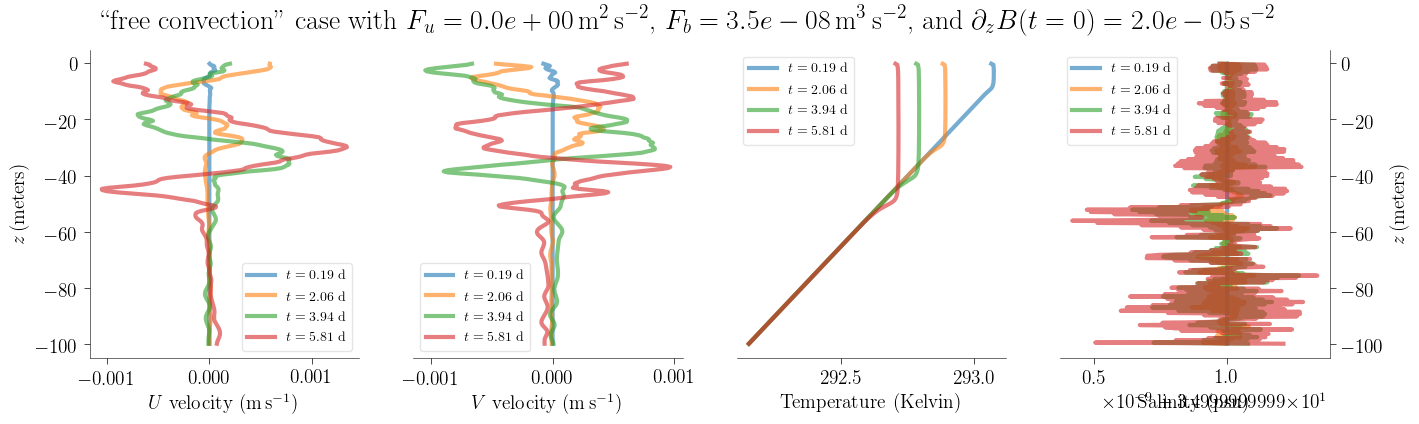

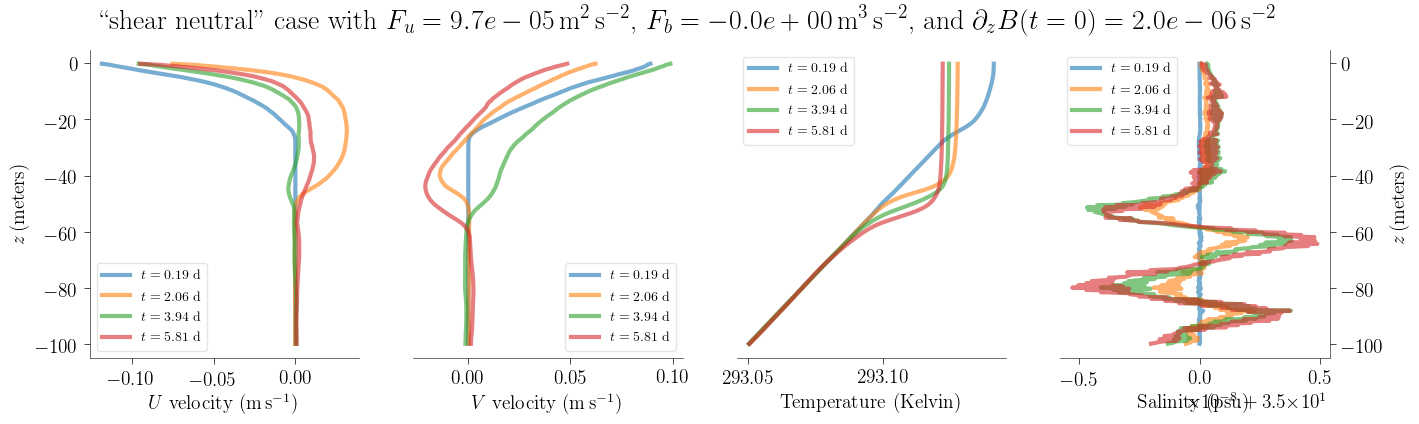

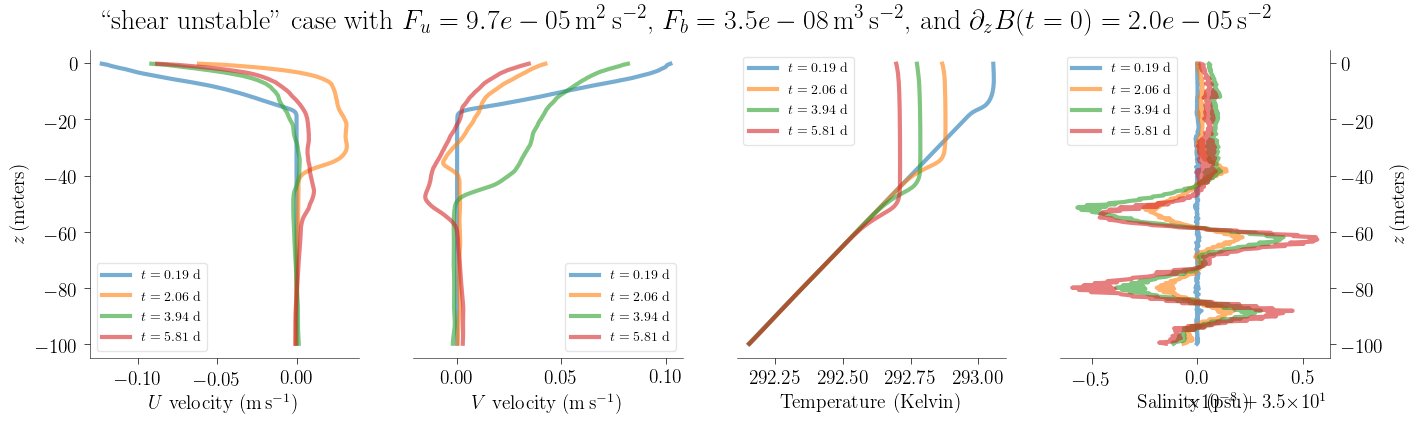

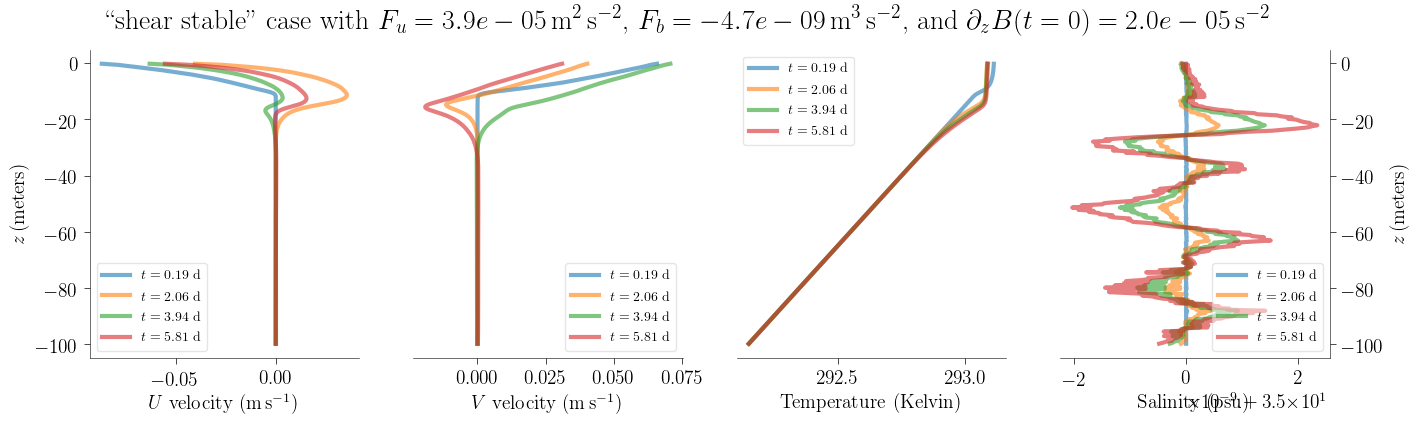

In [23]:
for case in cases
    column_data = ColumnData(examplepaths[case]; initial=2, targets=(12, 22, 32))
    fig, axs = visualize_targets(column_data)

    fig.suptitle("``" * replace(case, "_" => " ") * 
                    @sprintf("\" case with \$ F_u = %.1e \\, \\mathrm{m^2 \\, s^{-2}} \$,", column_data.Fu) *
                    @sprintf(" \$ F_b = %.1e \\, \\mathrm{m^3 \\, s^{-2}} \$,", column_data.Fb) * 
                    @sprintf(" and \$ \\partial_z B(t=0) = %.1e \\, \\mathrm{s^{-2}} \$", column_data.Bz), fontsize=20)
        
    fig.savefig(joinpath("..", "assets", case * "_les_summary.png"), dpi=480)
end